# Model Transferability
    
    Using the relevant data extracted from IMPORTANT_PBR_Ex1_4....ipynb we compare those measurements
    against exp2 and 3 daily sample's tecan measurements... we expect that if the models are transferable
    there should be a high degree of similarity
    
    # Use a730 measurements PBR2 and 3 Data as 720
    # Use the  Take the Data from the Models

In [2]:
import numpy as np
import pandas as pd
import os
import scipy

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec

import seaborn as sns
sns.set(style='whitegrid')

import itertools as it

from os.path import join as pjoin

%config InteractiveShell.ast_node_interactivity='all'
%config InlineBackend.figure_format = 'svg'

# tmPBR != PBR_at_sampling_time
    
    # Note Tecan measurements may have been affected
    as expected the measurements at the t

In [3]:
path = '../data_o/pbr/pbr_modeled_output_data'
fex2 = 'tec_scanned_pbr_and_pbr_measured_data_exp2_modeled.csv'
fex3 = 'tec_scanned_pbr_and_pbr_measured_data_exp3_modeled.csv'

In [4]:
dfe2 = pd.read_csv(pjoin(path,fex2))
dfe3 = pd.read_csv(pjoin(path,fex3))

In [5]:
# these are modeled with A560 ~ A680 + A720
# they should have similar values because the
# extinction coefficient should be applicable
# system to system


# Tecan data measured and modeled @ 730
# PBR data measured and modeled @ 720

# set all -negative predctions to zero
#dfe2[dfe2 < 0] = 0
#dfe3[dfe3 < 0] = 0

In [6]:
dfe2.columns = dfe2.columns.map(lambda x: x[:3])
dfe3.columns = dfe3.columns.map(lambda x: x[:3])

In [7]:
# PBR
pBs = [i for i in dfe2 if 'Bv' in i]
pCs = [i for i in dfe2 if 'Cv' in i]

# Tecan
tBs = [i for i in dfe2 if 'T' in i and 'B' in i]
tCs = [i for i in dfe2 if 'T' in i and 'C' in i]

In [8]:
pBs
tBs

pCs
tCs

['Bv1', 'Bv2', 'Bv3', 'Bv4', 'Bv5', 'Bv6', 'Bv7', 'Bv8']

['T1B', 'T2B', 'T3B', 'T4B', 'T5B', 'T6B', 'T7B', 'T8B']

['Cv1', 'Cv2', 'Cv3', 'Cv4', 'Cv5', 'Cv6', 'Cv7', 'Cv8']

['T1C', 'T2C', 'T3C', 'T4C', 'T5C', 'T6C', 'T7C', 'T8C']

In [9]:
dfe2

,Bv1,Cv1,Bv2,Cv2,Bv3,Cv3,Bv4,Cv4,Bv5,Cv5,...,T4B,T4C,T5B,T5C,T6B,T6C,T7B,T7C,T8B,T8C
0,-0.006048,-0.011649,0.009030,-0.011070,-0.003036,-0.012059,-0.000496,-0.012452,0.002033,-0.010383,...,0.005855,0.016180,0.004028,0.016438,0.006126,0.016652,0.004638,0.021193,-0.005713,0.027620
1,0.135798,0.034146,0.147725,0.032078,0.152597,0.022647,0.162485,0.015576,0.150280,0.041419,...,0.103945,0.015191,0.109838,0.029399,0.000792,0.017170,0.002260,0.020999,-0.002806,0.029497
2,0.062867,0.017881,0.070517,0.015249,0.117572,0.032112,0.110611,0.007499,0.115289,0.039567,...,0.075040,0.024839,0.092674,0.033132,-0.012924,0.053013,-0.005327,0.044082,-0.017054,0.071163
3,0.048931,0.027411,0.050150,0.026635,0.080686,0.025846,0.067438,0.010237,0.079655,0.023904,...,0.047569,0.010752,0.066213,0.010233,-0.002688,0.037979,0.001369,0.023650,-0.017500,0.043261
4,0.046641,0.028825,0.039890,0.033451,0.058774,0.018095,0.050301,0.021125,0.060565,0.015311,...,-0.011920,0.066475,0.069209,0.007427,0.016285,0.020207,0.011783,0.013895,0.012601,0.015065
5,0.041042,0.022000,0.038407,0.035389,0.051640,0.025088,0.044807,0.019673,0.054054,0.021676,...,0.021596,0.057471,0.044692,0.014657,-0.000655,0.026876,0.006388,0.017617,-0.035449,0.095292
6,0.058320,0.018079,0.032690,0.037697,0.035126,0.037370,0.046927,0.028801,0.042888,0.032067,...,0.010383,0.065070,0.043378,0.017462,-0.023002,0.081818,-0.003771,0.021323,-0.001637,0.070883
7,0.050017,0.010114,0.031304,0.011500,0.030141,0.044050,0.045491,0.009865,0.035154,0.039983,...,0.024300,0.040657,0.023689,0.028642,0.018163,0.031882,-0.005434,0.042367,0.054819,0.034582
8,0.019378,0.008041,0.048622,0.010485,0.054919,0.019716,0.055083,0.008414,0.028748,0.045725,...,0.038447,0.040840,0.022468,0.048546,0.031809,0.021641,-0.010169,0.055516,0.024453,0.047291
9,0.008496,-0.029020,0.027975,-0.016799,0.070094,0.003829,0.013865,0.009891,0.028879,0.048493,...,0.009722,0.033738,0.005325,0.036525,0.023260,0.021782,0.000267,0.037268,0.004668,0.048879


In [10]:
dfe2.columns.map(lambda x: x[:3])

Index(['Bv1', 'Cv1', 'Bv2', 'Cv2', 'Bv3', 'Cv3', 'Bv4', 'Cv4', 'Bv5', 'Cv5',
       'Bv6', 'Cv6', 'Bv7', 'Cv7', 'Bv8', 'Cv8', 'T1B', 'T1C', 'T2B', 'T2C',
       'T3B', 'T3C', 'T4B', 'T4C', 'T5B', 'T5C', 'T6B', 'T6C', 'T7B', 'T7C',
       'T8B', 'T8C'],
      dtype='object')

# PBR 2 

In [11]:

def quickplot2():
    """Compare the modeled predictions on Tecan Measured PBR  Sampled Data vs PBR
    Measured Data at Sampling Time"""
    
    # Strain Preds
    pebB = dfe2[pBs]
    tecB = dfe2[tBs]
    
    # Chlamy Preds
    pebC = dfe2[pCs]
    tecC= dfe2[tCs]
    
    fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,13))
    gs = gridspec.GridSpec(4,2)
    axes = []
    for r in range(0,4):
        for c in [0,1]:
            axes.append(plt.subplot(gs[r,c]))
    
    axes = (ax for ax in axes)
    for i in range(0,8):


        ax=next(axes)
        sns.regplot(x=pebB.iloc[:,i], y=tecB.iloc[:,i], color='red', ax=ax)
        sns.regplot(x=pebC.iloc[:,i], y=tecC.iloc[:,i], color='green', ax=ax)
        
        ax.set_ylabel('Tecan Meas. v'+str(i+1))
        ax.set_xlabel('PBR Meas. v'+str(i+1))
        

        s = str('B(RED) correlation: '+ str(np.corrcoef(x=pebB.iloc[:,i], y=tecB.iloc[:,i])[1][0].round(4))+'\n'+
        'x=y ratio: ' + str(np.polyfit(x=pebB.iloc[:,i], y=tecB.iloc[:,i], deg=1).round(4))+'\n'+
        'C(GREEN) correlation: '+ str(np.corrcoef(x=pebC.iloc[:,i], y=tecC.iloc[:,i])[1][0].round(4))+'\n'+
        'x=y ratio: '+str(np.polyfit(x=pebC.iloc[:,i], y=tecC.iloc[:,i], deg=1).round(4)))
        
        #print(s)
        
        x = np.linspace(-0.5,.3, 20)
        y = x
        ax.plot(x, y, '--r')
        ax.text(x=-0.03, y=.22, s=s, fontsize=10)
        ax.set_xlim((-.05, 0.2))
        ax.set_ylim((-0.05, 0.3))
        plt.tight_layout()




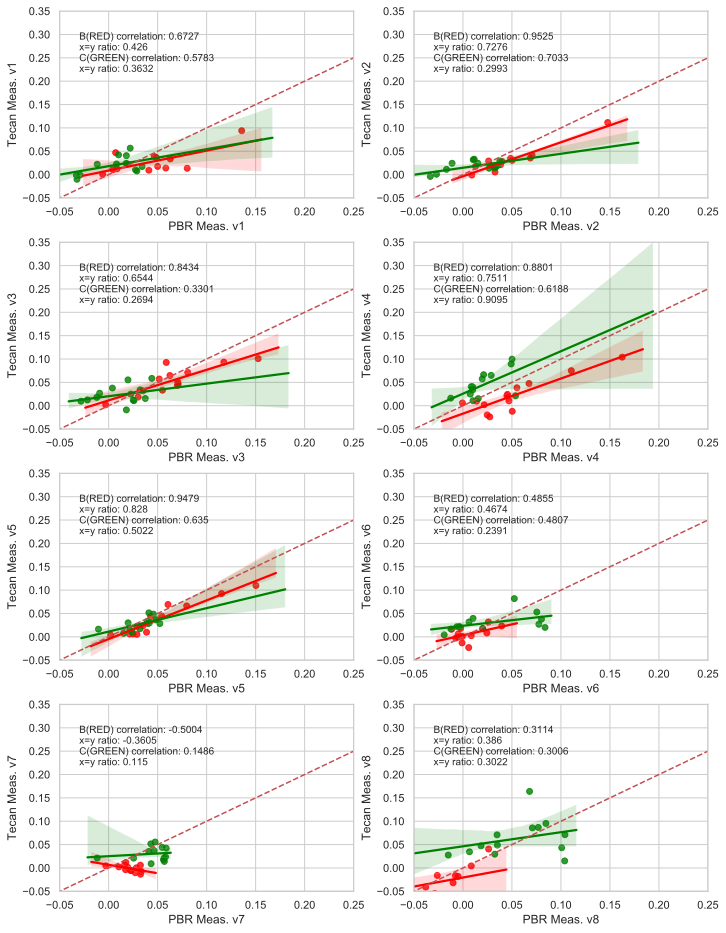

In [22]:
quickplot2()

# Analysis:
    # Expectations: Both sets of values should fall along the x=y line, and
    # since the data is taken over several days, postively increasing values 
    # should be noted. Both sets of values should have a strong correlation
    # since they are supposed to fall within the 1:1 line
    
    # However, this is not what we see. Most of the predictions for any given 
    # Vessel has the same trend: Tecan-measured values are greater than their
    # PBR values. While the Chlamy values have a tendency to 'hover' near the 
    # x=y line, this is likely because the signal is much better to pick up 
    # with the models as stated earliers. 
    
    # The growing trend is visible, but the change w.r.t to each other very
    # slightly, so that maybe be noise...
    
    # Values are predicted at .14 values which is much higher than expected
    # from the fact that the data was measured using different wavelenghts
    # And its very consisttenly accross both dataset, 
    
    
    # There are problems with respect to how the data was maasured, however, 
    # while the values are expected to be greater for the 720 (pbr-measured-pred)
    # we see that the Tecan has the overall larger values, meaning that what is
    # going on is much more of an instrumental difference. Of course going forwar
    # it would be best to measure the data at the same wavelengths, and if 
    # ever possible, collect data at the 'Special Model...'
    
    

# --------------------------------------------------------------------------------------------
    
    # Question: What is the effect of Measuring at 730 vs 720.... 730 measurements
    # are inherently lower, thus if you model them with the 720 they will also tend
    # te lower values overall    
    
# Analysis of Calibration Data:
    # Cal data is modeled A560 ~ A680 + A720
    # Cal data is modeled A560 ~ A680 + A730   p560*
    
    # How do the predicted p560 vs p560* compare....
    # B: 720 is larger than 730 predictions by 0.047 & correlation is 0.9554 | Therefore, if the intruments were equal
    # we would expect that the modeled PBR-measurements would be greater, but they're not. The Tecan-measured predictions
    # are much greater, meaning that the Tecan is probably measuring a much higher absorbance value, which is possible
    # given that these data do not have Media correciton as it hasn't not been done for the PBR, we just assume
    
    
    
    # C: 720 is smaller than 730 predictions by 0.024 & correlation is 0.9945 (i.e. C predictions should be similar despite the fact that they were modeled at slightly different wavelengths)

# PBR3

In [13]:

def quickplot3():
    """Compare the modeled predictions on Tecan Measured PBR  Sampled Data vs PBR
    Measured Data at Sampling Time"""
    
    # Strain Preds
    pebB = dfe3[pBs]

    tecB = dfe3[tBs]
    
    # Chlamy Preds
    pebC = dfe3[pCs]

    tecC= dfe3[tCs]
    
    fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,13))
    gs = gridspec.GridSpec(4,2)
    axes = []
    for r in range(0,4):
        for c in [0,1]:
            axes.append(plt.subplot(gs[r,c]))
    
    axes = (ax for ax in axes)
    for i in range(0,8):


        ax=next(axes)
        sns.regplot(x=pebB.iloc[:,i], y=tecB.iloc[:,i], color='red', ax=ax)
        sns.regplot(x=pebC.iloc[:,i], y=tecC.iloc[:,i], color='green', ax=ax)
        
        ax.set_ylabel('Tecan Meas. v'+str(i+1))
        ax.set_xlabel('PBR Meas. v'+str(i+1))
        

        s = str('B(RED) correlation: '+ str(np.corrcoef(x=pebB.iloc[:,i], y=tecB.iloc[:,i])[1][0].round(4))+'\n'+
        'x=y ratio: ' + str(np.polyfit(x=pebB.iloc[:,i], y=tecB.iloc[:,i], deg=1).round(4))+'\n'+
        'C(GREEN) correlation: '+ str(np.corrcoef(x=pebC.iloc[:,i], y=tecC.iloc[:,i])[1][0].round(4))+'\n'+
        'x=y ratio: '+str(np.polyfit(x=pebC.iloc[:,i], y=tecC.iloc[:,i], deg=1).round(4)))
        
        #print(s)
        
        x = np.linspace(-0.5,.3, 20)
        y = x
        ax.plot(x, y, '--r')
        ax.text(x=-0.03, y=.15, s=s)
        ax.set_xlim((-.05, 0.20))
        ax.set_ylim((-0.05, 0.20))
        plt.tight_layout()




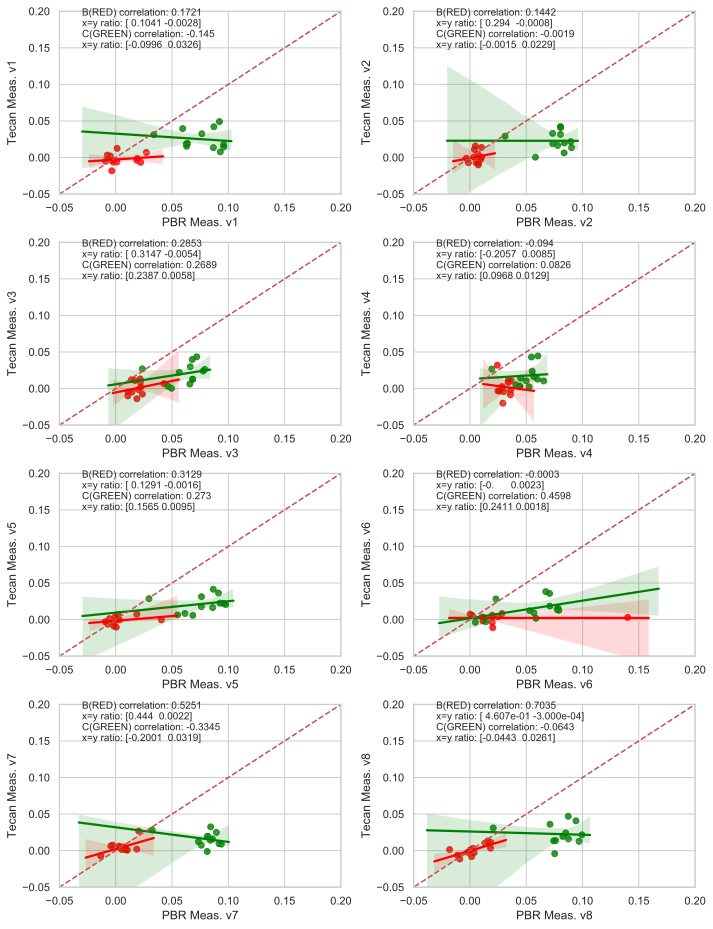

In [14]:
quickplot3()

In [15]:
# Correct and Model

# Corrected

# Import Correction Data
# Create Correction Models
# Both Data has to be Corrected

path = '../data_o/calibration/community_calibration/created_models/reqd_corr_funcs_parameters.csv'

def get_corr_params(file_loc, model='A680_A750_560'):
    
    print(model)
    
    df = pd.read_csv(path, index_col=0, engine='python')
    
    return df.loc[model].values

def  corr_func_Bsc(pB, pC, parameters, which_a2=None):
    
    # There are 3 options about which a2 to use,
    # a2 refers to the breadth of the correcting
    # parabola. These are either the:
        # mean
        # median
        # a2 @ [B]= 0 (Row12)
    
    #print(parameters)
    a2s = parameters[:-2]
    hfit = parameters[-2:]
    # WHICH Parabolic BREADTH to use for correction
    if which_a2 =='mean':
        a2 = np.mean(a2s) # this is the mean
        
    elif which_a2 =='median':
        a2 = np.median(a2s) # this should be more robust to outliers
    
    # set as default
    else:
        a2 = -0.499525586 #global over 3 models... also this has the effect
        # of 'canceling out' the need for 'b' as 

    # given the fitted line avove, use poly1d to create a 
    # prediction function
    htor = np.poly1d(hfit)
    
    # takes in the predicted pB and spits out h in (h, k) the parabola
    # that lives at this pB... i.e. vertex is at (h,pB)
    lH = htor(pB)
    
    
    # IMPORTANT #
    # this is from an algebraic manipulation of the parabolic function
    # in polynomial and parabolic form where h = -b/2*a2 --- since we
    # "know: a2 and p_h is dependant on the concetration of B we 
    # estimate the likely value of b in f(x) = a2*x^2 + b*x + c
    b = np.multiply(-2*lH,a2 )    
    cv_tor = np.poly1d([a2, b, 0])
    
    return cv_tor(pC)


# Correct and Plot

In [16]:
parameters = get_corr_params(path, model='A680_A730_560')

A680_A730_560


In [17]:
def quickplot2():
    """Compare the modeled predictions on Tecan Measured PBR  Sampled Data vs PBR
    Measured Data at Sampling Time"""
    
 
    
    ##### CORRECTING #####
    
    peb = dfe2[pBs+pCs].copy()
    tec = dfe2[tBs+tCs].copy()
    #tcdf['Ctmp_'+WC] = tcdf['C_p'+WC].copy()
    
    

    for i in range(1, 9):
        v = str(i)

    # CORRECT pB
    # use the uncorrected values to correct these 
    peb['Bvo'+v] = peb['Bv'+v].copy()
    peb['pcv'+v] =  peb.apply(lambda x: corr_func_Bsc(x['Bv'+v], x['Cv'+v], parameters,
                             which_a2=None), axis=1)
    peb['Bv'+v] = peb['Bvo'+v] - peb['pcv'+v]
    
    
    
    
    tec['tcv'+v] =  tec.apply(lambda x: corr_func_Bsc(x['T'+v+'B'], x['T'+v+'C'], parameters,
                         which_a2=None), axis=1)
    
    tec['T'+v+'B'] = tec['T'+v+'B'] - tec['tcv'+v]

    
    ######## split for plotting #########
    
    pebB = peb[pBs]
    pebC = peb[pCs]
    
    tecB = tec[tBs]
    tecC = tec[tCs]
    ###############REPLOT################
    
    fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,13))
    gs = gridspec.GridSpec(4,2)
    axes = []
    for r in range(0,4):
        for c in [0,1]:
            axes.append(plt.subplot(gs[r,c]))
    
    axes = (ax for ax in axes)
    for i in range(0,8):

        ax=next(axes)
        
        
        sns.regplot(x=pebB.iloc[:,i], y=tecB.iloc[:,i], color='red', ax=ax)
        sns.regplot(x=pebC.iloc[:,i], y=tecC.iloc[:,i], color='green', ax=ax)
        

        
        ax.set_ylabel('Tecan Meas. v'+str(i+1))
        ax.set_xlabel('PBR Meas. v'+str(i+1))
        

        s = str('B(RED) correlation: '+ str(np.corrcoef(x=pebB.iloc[:,i], y=tecB.iloc[:,i])[1][0].round(4))+'\n'+
        'x=y ratio: ' + str(np.polyfit(x=pebB.iloc[:,i], y=tecB.iloc[:,i], deg=1)[0].round(4))+'\n'+
        'C(GREEN) correlation: '+ str(np.corrcoef(x=pebC.iloc[:,i], y=tecC.iloc[:,i])[1][0].round(4))+'\n'+
        'x=y ratio: '+str(np.polyfit(x=pebC.iloc[:,i], y=tecC.iloc[:,i], deg=1)[0].round(4)))
        
        #print(s)
        
        x = np.linspace(-0.5,.3, 20)
        y = x
        ax.plot(x, y, '--r')
        ax.text(x=-0.03, y=.22, s=s, fontsize=10)
        ax.set_xlim((-.05, 0.25))
        ax.set_ylim((-0.05, 0.35))
        
    plt.tight_layout()

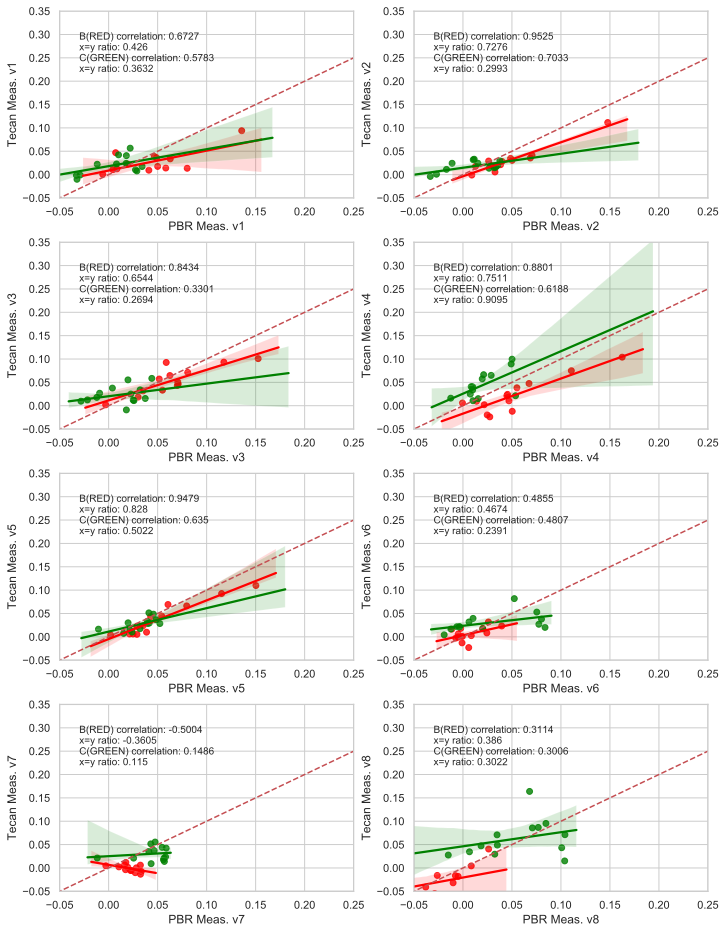

In [18]:
quickplot2()

In [19]:
corr_func_Bsc(.13, 0.03, parameters)

0.011328439043147934

In [20]:

def quickplot3():
    """Compare the modeled predictions on Tecan Measured PBR  Sampled Data vs PBR
    Measured Data at Sampling Time"""
    
    
    ##### CORRECTING #####
    
    peb = dfe3[pBs+pCs].copy()
    tec = dfe3[tBs+tCs].copy()
    #tcdf['Ctmp_'+WC] = tcdf['C_p'+WC].copy()
    
    

    for i in range(1, 9):
        v = str(i)

    # CORRECT pB
    # use the uncorrected values to correct these 
    peb['Bvo'+v] = peb['Bv'+v].copy()
    peb['pcv'+v] =  peb.apply(lambda x: corr_func_Bsc(x['Bv'+v], x['Cv'+v], parameters,
                             which_a2=None), axis=1)
    peb['Bv'+v] = peb['Bvo'+v] - peb['pcv'+v]
    
    
    
    
    tec['tcv'+v] =  tec.apply(lambda x: corr_func_Bsc(x['T'+v+'B'], x['T'+v+'C'], parameters,
                         which_a2=None), axis=1)
    
    tec['T'+v+'B'] = tec['T'+v+'B'] - tec['tcv'+v]

    
    ######## split for plotting #########
    
    pebB = peb[pBs]
    pebC = peb[pCs]
    
    tecB = tec[tBs]
    tecC = tec[tCs]
    ###############REPLOT################
    
    fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,13))
    gs = gridspec.GridSpec(4,2)
    axes = []
    for r in range(0,4):
        for c in [0,1]:
            axes.append(plt.subplot(gs[r,c]))
    
    axes = (ax for ax in axes)
    for i in range(0,8):


        ax=next(axes)
        sns.regplot(x=pebB.iloc[:,i], y=tecB.iloc[:,i], color='red', ax=ax)
        sns.regplot(x=pebC.iloc[:,i], y=tecC.iloc[:,i], color='green', ax=ax)
        
        ax.set_ylabel('Tecan Meas. v'+str(i+1))
        ax.set_xlabel('PBR Meas. v'+str(i+1))
        

        s = str('B(RED) correlation: '+ str(np.corrcoef(x=pebB.iloc[:,i], y=tecB.iloc[:,i])[1][0].round(4))+'\n'+
        'x=y ratio: ' + str(np.polyfit(x=pebB.iloc[:,i], y=tecB.iloc[:,i], deg=1).round(4)[0])+'\n'+
        'C(GREEN) correlation: '+ str(np.corrcoef(x=pebC.iloc[:,i], y=tecC.iloc[:,i])[1][0].round(4))+'\n'+
        'x=y ratio: '+str(np.polyfit(x=pebC.iloc[:,i], y=tecC.iloc[:,i], deg=1).round(4))[0])
        
        #print(s)
        
        x = np.linspace(-0.5,.3, 20)
        y = x
        ax.plot(x, y, '--r')
        ax.text(x=-0.03, y=.12, s=s)
        ax.set_xlim((-.05, 0.20))
        ax.set_ylim((-0.05, 0.20))
        plt.tight_layout()




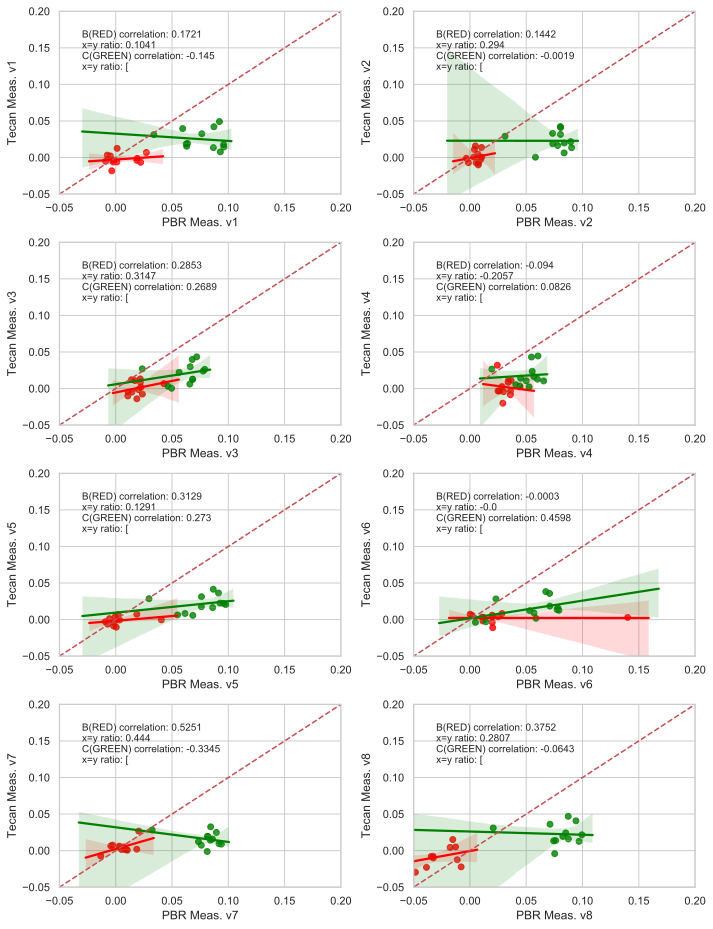

In [21]:
quickplot3()